# Supervised Learning: Linear Regression


In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
# Loading the Boston dataset
data_boston = load_boston()

In [5]:
print(data_boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Visualize

In [6]:
# This is the target variable -> MEDV     Median value of owner-occupied homes in $1000's 

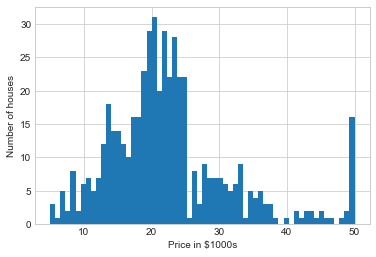

In [8]:
# Histogram of prices (this is the target of our dataset)
plt.hist(data_boston.target,bins=60)

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')
plt.show()

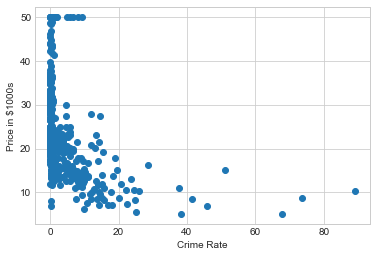

In [10]:
# Plot the column at the 0 index (Labeled CRIM)
plt.scatter(data_boston.data[:,0],data_boston.target)

#label
plt.ylabel('Price in $1000s')
plt.xlabel('Crime Rate')
plt.show()

In [12]:
boston_df = DataFrame(data_boston.data)

In [13]:
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
boston_df.columns = data_boston.feature_names

In [18]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [19]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [20]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
# Creating the target variable
boston_df['Price'] = data_boston.target

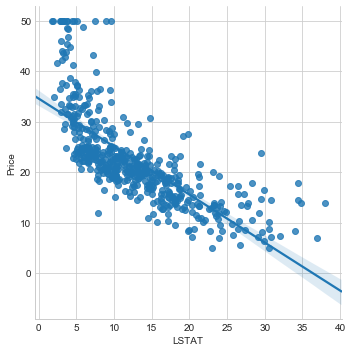

In [45]:
sns.lmplot('LSTAT','Price',data = boston_df)

# LSTAT INCREASES, HOUSES COST LESS

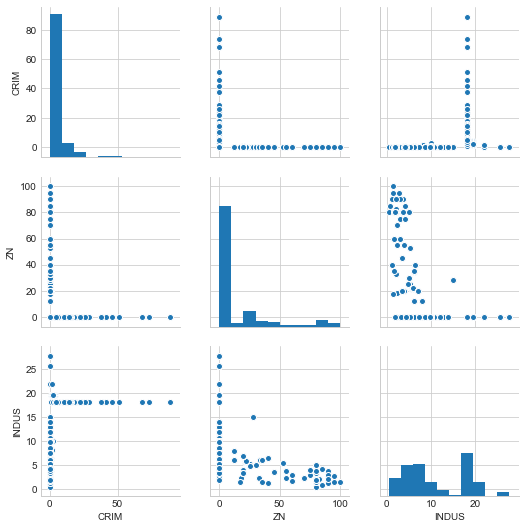

In [24]:
# Quick example of a pairplot
sns.pairplot(boston_df.iloc[0:,0:3])

### Linear Regression (Univariate)

In [118]:
# Set up X as median crime rate
# This does not work because it does not have any attributes
# Which is weird
X = boston_df.LSTAT

# Use v to make X two-dimensional
# to make the shape to one attribute
X = np.vstack(boston_df.LSTAT)


In [119]:
X.shape

(506, 1)

In [36]:
# Set up Y as the target price of the houses.
Y = boston_df.Price

Now that we have our X and Y, let's go ahead and use numpy to create the single variable linear regression.

We know that a line has the equation: $$y=mx+b$$ which we can rewrite using matrices: $$y=Ap$$ where: $$A = \begin{bmatrix}x & 1\end{bmatrix}$$ and $$p= \begin{bmatrix}m \\b\end{bmatrix}$$


In [121]:
# List comprehension to make the A matrix [x 1]
X = np.array([[value, 1] for value in X])

In [49]:
m, b = np.linalg.lstsq(X,Y)[0]

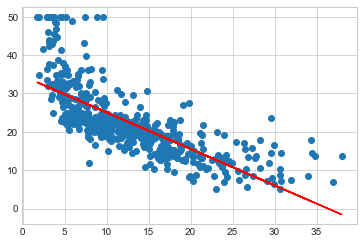

In [56]:
plt.plot(boston_df.LSTAT, boston_df.Price, 'o')

x = boston_df.LSTAT

plt.plot(x, m*x+b, 'r', label='Best Fit Line')

In [ ]:
# SAME PLOT AS THE ONE WE CREATED WITH SEABORN

### Getting the Error

In [61]:
result = np.linalg.lstsq(X, Y)
error_tot = result[1]

rmse = np.sqrt(error_tot/len(X))

print("The root mean error was {0:.2f}".format(rmse[0]))

The root mean error was 6.20


In [62]:
# Reminder: A house will not vary more than 2 times
# the RMSE value 95% of the time


Thus we can reasonably expect a house price to be within $12,400 of our line fit (6.20 *2).



### Linear Regression (Multivariate)

In [63]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [64]:
# Create a LinearRegression Object
linreg = LinearRegression()

The functions we will be using are:

lreg.fit() which fits a linear model

lreg.predict() which is used to predict Y using the linear model with estimated coefficients

lreg.score() which returns the coefficient of determination (R^2). 

In [72]:
# Data Columns
X_vals = boston_df.drop('Price',axis=1)

In [73]:
# Targets
Y_target = boston_df.Price

In [76]:
# Implement Linear Regression
linreg.fit(X_vals,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
print(' The estimated intercept coefficient is {0:.2f}'.format(linreg.intercept_))


 The estimated intercept coefficient is 36.49


In [85]:
print(' The number of coefficients used is {0:.2f} whose values were \n {1}'.format(len(linreg.coef_),linreg.coef_ ))


 The number of coefficients used is 13.00 whose values were 
 [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


In [92]:
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(linreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Using Training and Validation

- In a dataset a training set is implemented to build up a model, while a validation set is used to validate the model built. Data points in the training set are excluded from the validation set. The correct way to pick out samples from your dataset to be part either the training or validation (also called test) set is randomly.

In [96]:
from sklearn.model_selection import train_test_split

In [137]:
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = train_test_split(X, boston_df.Price)


In [138]:
# Create our regression object
lreg = LinearRegression()

lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [139]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [148]:
rmse_train = np.sqrt(np.mean((Y_train - pred_train) ** 2))
rmse_test = np.sqrt(np.mean((Y_test - pred_test) ** 2))

In [152]:
print("Fit a model X_train, and calculate RMSE with Y_train: {0:.2f}".format(rmse_train))
    
print("Fit a model X_train, and calculate RMSE with X_test and Y_test: {0:.2f}".format(rmse_test))

Fit a model X_train, and calculate RMSE with Y_train: 6.07
Fit a model X_train, and calculate RMSE with X_test and Y_test: 6.62


In [153]:
# Similar RMSE Score

### Visualize Residual

In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual, so that:

$$Residual = Observed\:value - Predicted\:value $$


A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Residual plots are a good way to visualize the errors in your data. If you have done a good job then your data should be randomly scattered around line zero. If there is some strucutre or pattern, that means your model is not capturing some thing. There could be an interaction between 2 variables that you're not considering, or may be you are measuring time dependent data. If this is the case go back to your model and check your data set closely.


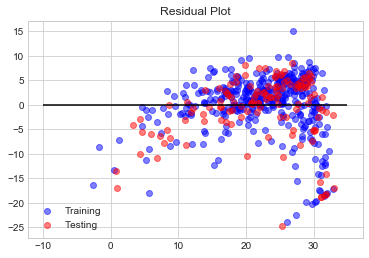

In [157]:
train = plt.scatter(pred_train, (pred_train-Y_train), c='b', alpha=0.5)

test = plt.scatter(pred_test, (pred_test-Y_test), c='r', alpha=0.5)

plt.hlines(y=0, xmin=-10, xmax=35)

plt.legend((train,test), ('Training', 'Testing'), loc='lower left')

plt.title('Residual Plot')

plt.show()

### Resources
- http://blog.minitab.com/blog/adventures-in-statistics-2/why-you-need-to-check-your-residual-plots-for-regression-analysis
- http://scikit-learn.org/stable/modules/linear_model.html#linear-model 
- http://blog.minitab.com/blog/adventures-in-statistics-2/why-you-need-to-check-your-residual-plots-for-regression-analysis
- http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html
- http://scikit-learn.org/stable/modules/linear_model.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html
- 